# Assignment "Exploring AirBnB in Athens"



Μαλανδράκης Γιώργος ΑΜ: 8200094

## Importing important packages

In [1]:
# Import important packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import re
from matplotlib.dates import MonthLocator
from IPython.display import IFrame
from scipy.stats import spearmanr

## Displaying max columns

In [2]:
# Set maximum columns to be displayed
pd.set_option('display.max_columns', 100)

## Importing and viewing data

In [3]:
# Import and view Airbnb listings data
old_listings = pd.read_csv('listings.csv')
old_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20230921043851,2023-09-21,city scrape,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,8.0,10.0,"['email', 'phone']",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.988630,23.765270,Entire condo,Entire home/apt,10,NaN,2 baths,3.0,5.0,"[""Keypad"", ""Hair dryer"", ""High chair"", ""Hot wa...",$144.00,1,180,1,5,180,180,4.3,180.0,NaN,t,24,54,84,359,2023-09-21,42,8,1,2011-05-20,2023-09-10,4.83,4.86,4.81,4.88,4.88,4.60,4.74,00000957568,t,7,7,0,0,0.28
1,10990,https://www.airbnb.com/rooms/10990,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,8.0,10.0,"['email', 'phone']",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.989030,23.764480,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""High chair"", ""Smart lock"", ""Ho...",$70.00,1,1125,1,2,1125,1125,1.2,1125.0,NaN,t,14,44,74,74,2023-09-21,66,3,0,2012-09-06,2023-07-01,4.80,4.83,4.83,4.89,4.89,4.78,4.75,00001070920,t,7,7,0,0,0.49
2,10993,https://www.airbnb.com/rooms/10993,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Greece",Athens Quality Apartments is a company started...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,8.0,10.0,"['email', 'phone']",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.988880,23.764730,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,2.0,"[""Security cameras on property"", ""Hair dryer"",...",$85.00,1,90,1,2,90,90,1.2,90.0,NaN,t,11,41,52,52,2023-09-21,92,5,0,2012-09-24,20

In [4]:
#Select and view relevant columns from the listings dataset
listings = old_listings[['id', 'listing_url', 'name', 'description', 'host_id', 'price',
                        'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
                        'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'number_of_reviews_ltm', 'reviews_per_month']]
print("Sample Airbnb listings data:")
listings.head()

Sample Airbnb listings data:


,id,listing_url,name,description,host_id,price,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews_ltm,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,37177,$144.00,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,10,2 baths,3.0,5.0,8,0.28
1,10990,https://www.airbnb.com/rooms/10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,37177,$70.00,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,4,1 bath,1.0,1.0,3,0.49
2,10993,https://www.airbnb.com/rooms/10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,37177,$85.00,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,2,1 bath,NaN,2.0,5,0.69
3,10995,https://www.airbnb.com/rooms/10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,"AQA No2 is 1-bedroom apartment (47m2), on the ...",37177,$60.00,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,4,1 bath,1.0,2.0,1,0.19
4,724485,https://www.airbnb.com/rooms/724485,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,"Value for money in an central but not ""tourist...",3745284,$35.00,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.98985,23.73779,Entire home/apt,2,1 bath,1.0,1.0,26,3.87


In [5]:
# Import and view the calendar dataset
calendar = pd.read_csv('calendar.csv')
print("Sample data from the calendar dataset:")
calendar.head()

Sample data from the calendar dataset:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180


In [6]:
# Import and view the reviews dataset

reviews = pd.read_csv('reviews.csv')
print("Sample data from the reviews dataset:")
reviews.head()

Sample data from the reviews dataset:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...


## Cleaning up data
Before proceeding with the analysis, we should perform some data cleaning. Specifically, we need to remove listings that have certain attributes set to zero. This includes listings with zero accommodates, zero bedrooms, zero beds, and those with a price per night set to 0 euros.

In [7]:
listings = listings[listings['accommodates'] != 0]
listings = listings[listings['bedrooms'] != 0]
listings = listings[listings['beds'] != 0]
listings = listings[listings['price'] != 0.00]

Next, we should convert all the price values to the "float" data type and remove the dollar sign to ensure consistency in the data.




In [8]:
listings['price'] = listings['price'].str.replace('[\\$,]', '', regex=True).astype(float)
calendar['price'] = calendar['price'].str.replace('[\\$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('[\\$,]', '', regex=True).astype(float)

To validate the prices, we can sort our data to observe potential anomalies or outliers that might require further examination.




In [9]:
listings.sort_values(by='price', ascending=False).head(40)[['listing_url','price','accommodates']]

,listing_url,price,accommodates
3641,https://www.airbnb.com/rooms/32463338,80275.0,6
1623,https://www.airbnb.com/rooms/21106510,8000.0,6
7458,https://www.airbnb.com/rooms/559861564727237713,8000.0,4
2992,https://www.airbnb.com/rooms/29363635,8000.0,6
6520,https://www.airbnb.com/rooms/51257107,8000.0,6
6619,https://www.airbnb.com/rooms/51341771,8000.0,4
6620,https://www.airbnb.com/rooms/51342328,8000.0,6
3054,https://www.airbnb.com/rooms/29173172,8000.0,3
932,https://www.airbnb.com/rooms/14757686,5000.0,3
2466,https://www.airbnb.com/rooms/26068002,4849.0,2


In [10]:
listings.sort_values(by='price', ascending=True).head(100)[['listing_url','price','accommodates']]

,listing_url,price,accommodates
12128,https://www.airbnb.com/rooms/928019327168641990,10.0,1
2350,https://www.airbnb.com/rooms/25334566,10.0,1
1008,https://www.airbnb.com/rooms/16141034,10.0,2
4188,https://www.airbnb.com/rooms/35349352,10.0,1
4202,https://www.airbnb.com/rooms/35350224,11.0,1
...,...,...,...
6539,https://www.airbnb.com/rooms/51286027,18.0,1
7045,https://www.airbnb.com/rooms/53321457,18.0,2
4461,https://www.airbnb.com/rooms/36540385,18.0,2
3364,https://www.airbnb.com/rooms/31157119,18.0,4


We will exclude the listing with an 80k price, as it appears to be invalid. To support this decision, we conducted research and identified that the highest price per night found on Airbnb's website is approximately 60k, observed for a listing in the Bahamas (screenshot below).

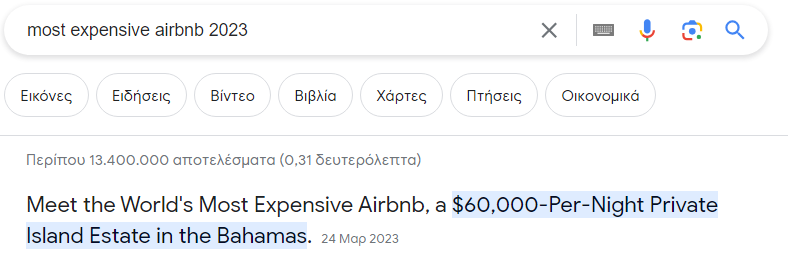

We cannot guarantee the accuracy or reliability of other listings with exceptionally high prices, as we have identified cases such as a listing priced at 8,000 EUR per night in November (as shown in the screenshot below). Furthermore, it's essential to account for seasonality when analyzing pricing data. It's worth noting that during the summer, prices in Athens tend to be higher due to increased demand from tourists and visitors.




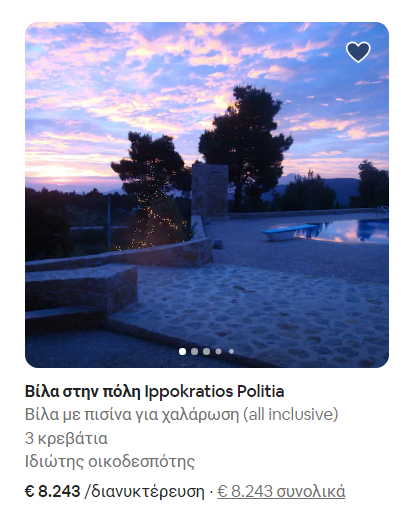


In [11]:
# Filtering listings and calendar data to include only valid price values
listings = listings[(listings['price'] < 10000)]
calendar = calendar[(calendar['price'] > 0) & (calendar['price'] < 10000)]

To ensure the accuracy of our data, we need to verify that all the listings have valid latitude and longitude coordinates, indicating that they are indeed located within the boundaries of Athens or the wider Attica region. We can do this by referencing geographical boundaries or limits for Athens and Attica.

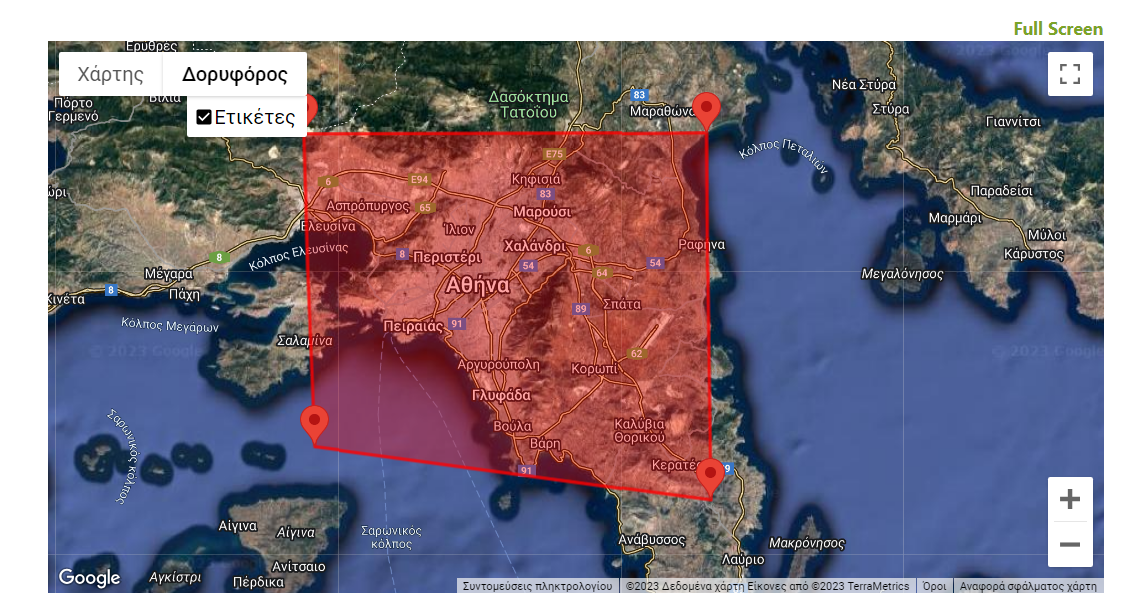
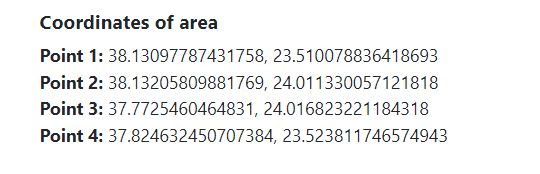

In [12]:
# Filter listings based on geographic boundaries for Athens and the Attica region
# We include listings with latitude between 37.77 and 38.13 (Athens latitude boundaries)
# and longitude between 23.51 and 24.01 (Athens longitude boundaries) to ensure they are located in the area.

listings = listings[(listings['latitude'] >= 37.77) 
              & (listings['latitude'] <= 38.13) 
              & (listings['longitude'] >= 23.51) 
              & (listings['longitude'] <= 24.01) 
]


Now, we can utilize the `.describe()` method to examine the minimum and maximum values for features such as accommodates, bathrooms, bedrooms, beds, price, and reviews.

In [13]:
listings.describe()

,id,host_id,price,latitude,longitude,accommodates,bedrooms,beds,number_of_reviews_ltm,reviews_per_month
count,1.295400e+04,1.295400e+04,12954.000000,12954.000000,12954.000000,12954.000000,11455.000000,12840.000000,12954.000000,10998.000000
mean,3.450822e+17,2.074283e+08,104.270187,37.980256,23.731754,3.681566,1.492100,2.063318,13.736761,1.795885
std,4.025342e+17,1.679959e+08,220.891911,0.013460,0.012458,1.944443,0.820392,1.401643,19.793020,1.780374
min,1.059500e+04,1.805000e+03,10.000000,37.950322,23.697700,1.000000,1.000000,1.000000,0.000000,0.010000
25%,3.031469e+07,5.520153e+07,50.000000,37.969172,23.723993,2.000000,1.000000,1.000000,0.000000,0.460000
50%,5.096458e+07,1.748823e+08,71.000000,37.978630,23.729734,4.000000,1.000000,2.000000,5.000000,1.180000
75%,7.824094e+17,3.428780e+08,113.000000,37.988390,23.737750,4.000000,2.000000,3.000000,19.000000,2.620000
max,9.842893e+17,5.375438e+08,8000.000000,38.030830,23.780220,16.000000,14.000000,30.000000,206.000000,15.500000


These statistics confirm the dataset's validity, and we can proceed with the assignment confidently.

## Neighbourhood Listings in Descending Order

Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

Before proceeding, let's ensure that the "neighbourhood_cleansed" column does not contain any missing or NaN values.




In [14]:
# Checking for missing values in the 'neighbourhood_cleansed' column
missing_values = listings['neighbourhood_cleansed'].isnull().sum()

# If there are no missing values, proceed with displaying neighborhood counts based on listings
if missing_values == 0:
    # Calculate the number of listings per neighborhood
    neighborhood_counts_listings = listings['neighbourhood_cleansed'].value_counts()
    
    # Creating a DataFrame to present the results
    neighborhood_counts_listings_df = pd.DataFrame({'Neighbourhood': neighborhood_counts_listings.index, 'Listings Count': neighborhood_counts_listings.values})

# Convert 'id' column in 'listings' DataFrame to string
listings['id'] = listings['id'].astype(str)


# Calculate the number of reviews per neighborhood from the reviews dataset
reviews['listing_id'] = reviews['listing_id'].astype(str)  # Ensure the 'listing_id' is of the same data type as in listings
reviews_per_neighborhood = reviews.groupby('listing_id')['id'].count().reset_index()
reviews_per_neighborhood = reviews_per_neighborhood.rename(columns={'id': 'Reviews Count'})
reviews_neighborhood_merged = listings[['id', 'neighbourhood_cleansed']].merge(reviews_per_neighborhood, how='left', left_on='id', right_on='listing_id')
reviews_counts_per_neighborhood = reviews_neighborhood_merged.groupby('neighbourhood_cleansed')['Reviews Count'].sum().reset_index()

# Creating a DataFrame to present the results based on reviews
neighborhood_counts_reviews_df = pd.DataFrame({'Neighbourhood': reviews_counts_per_neighborhood['neighbourhood_cleansed'], 'Reviews Count': reviews_counts_per_neighborhood['Reviews Count']})

# Merge the two DataFrames based on the 'Neighbourhood' column to compare both rankings
merged_neighborhood_df = neighborhood_counts_listings_df.merge(neighborhood_counts_reviews_df, on='Neighbourhood')

# Display the merged DataFrame
merged_neighborhood_df

,Neighbourhood,Listings Count,Reviews Count
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416,155818.0
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122,75216.0
2,ΝΕΟΣ ΚΟΣΜΟΣ,980,47481.0
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,978,37591.0
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817,37690.0
5,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583,17754.0
6,ΠΑΓΚΡΑΤΙ,511,19022.0
7,ΑΜΠΕΛΟΚΗΠΟΙ,452,15508.0
8,ΚΟΛΩΝΑΚΙ,425,14437.0
9,ΘΗΣΕΙΟ,386,28087.0


In [15]:
# Calculate the rankings for the number of listings
merged_neighborhood_df['Listings Rank'] = merged_neighborhood_df['Listings Count'].rank(ascending=False)

# Calculate the rankings for the number of reviews
merged_neighborhood_df['Reviews Rank'] = merged_neighborhood_df['Reviews Count'].rank(ascending=False)

# Calculate Spearman's rank correlation
correlation, _ = spearmanr(merged_neighborhood_df['Listings Rank'], merged_neighborhood_df['Reviews Rank'])
print(f"Spearman's Rank Correlation Coefficient: {correlation:.2f}")

# Display the merged DataFrame with rankings for both listings and reviews
merged_neighborhood_df

Spearman's Rank Correlation Coefficient: 0.95


,Neighbourhood,Listings Count,Reviews Count,Listings Rank,Reviews Rank
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416,155818.0,1.0,1.0
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122,75216.0,2.0,2.0
2,ΝΕΟΣ ΚΟΣΜΟΣ,980,47481.0,3.0,3.0
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,978,37591.0,4.0,5.0
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817,37690.0,5.0,4.0
5,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583,17754.0,6.0,10.0
6,ΠΑΓΚΡΑΤΙ,511,19022.0,7.0,9.0
7,ΑΜΠΕΛΟΚΗΠΟΙ,452,15508.0,8.0,13.0
8,ΚΟΛΩΝΑΚΙ,425,14437.0,9.0,14.0
9,ΘΗΣΕΙΟ,386,28087.0,10.5,7.0


A positive correlation (closer to 1) indicates that the rankings based on listings and reviews are positively related, meaning they are similar. In our dataset, the Spearman's Rank Correlation Coefficient is approximately 0.95, which suggests a very strong positive correlation. This implies that neighborhoods with more listings tend to also have more reviews, and vice versa, showing a clear relationship between the popularity of neighborhoods based on both metrics.




## Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

In [16]:
# Grouping listings by neighborhood
neighborhoods = listings.groupby('neighbourhood_cleansed')

# Creating a table with median, mean, standard deviation, and count of listings per neighborhood
neighborhoods_table = neighborhoods['price'].agg(['median', 'mean', 'std', 'count']) \
    .sort_values(by='median', ascending=False) \
    .rename(columns={"count": "Number of Listings"})

neighborhoods_table

,median,mean,std,Number of Listings
neighbourhood_cleansed,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.800000,578.622675,5
ΖΑΠΠΕΙΟ,114.0,224.068323,641.163173,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.650662,229.183015,2416
ΑΚΡΟΠΟΛΗ,100.0,195.344560,703.321565,386
ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284314,104.613533,1122
ΘΗΣΕΙΟ,90.0,126.492228,124.176775,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883382,136.367487,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162


## Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

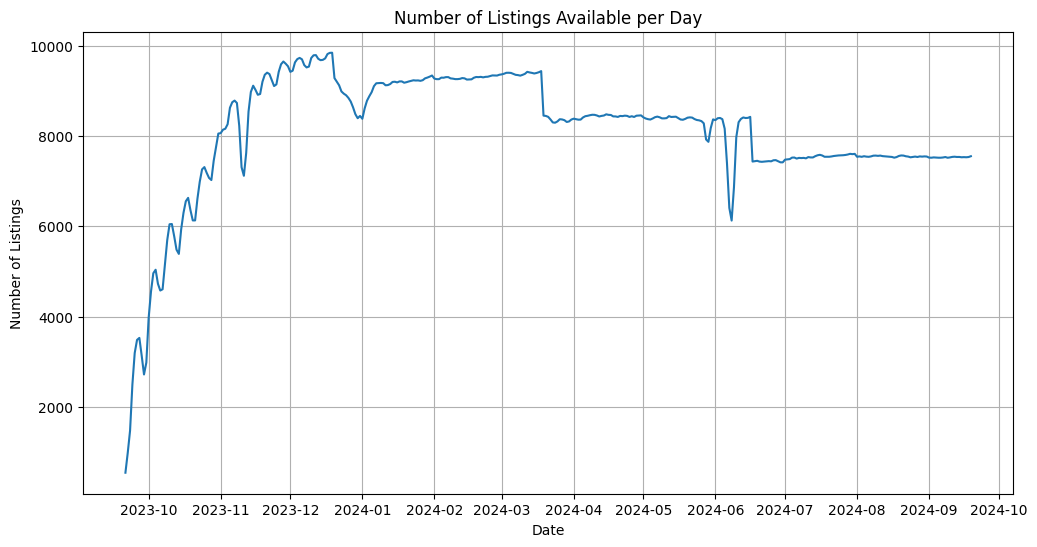

In [17]:
# Filter the DataFrame to include only rows where 'available' is 't' (true)
available_listings = calendar[calendar['available'] == 't']

# Group the data by date and count the number of available listings for each date
availability_data = available_listings.groupby('date')['listing_id'].count()

# Convert the 'date' column to a datetime data type (if not already)
availability_data.index = pd.to_datetime(availability_data.index)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(availability_data.index, availability_data.values, linestyle='-')

# Set plot title and axis labels
plt.title('Number of Listings Available per Day')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.grid(True)

# Add x-axis labels at the beginning of each month
plt.gca().xaxis.set_major_locator(MonthLocator())

# Display the plot
plt.show()

## Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

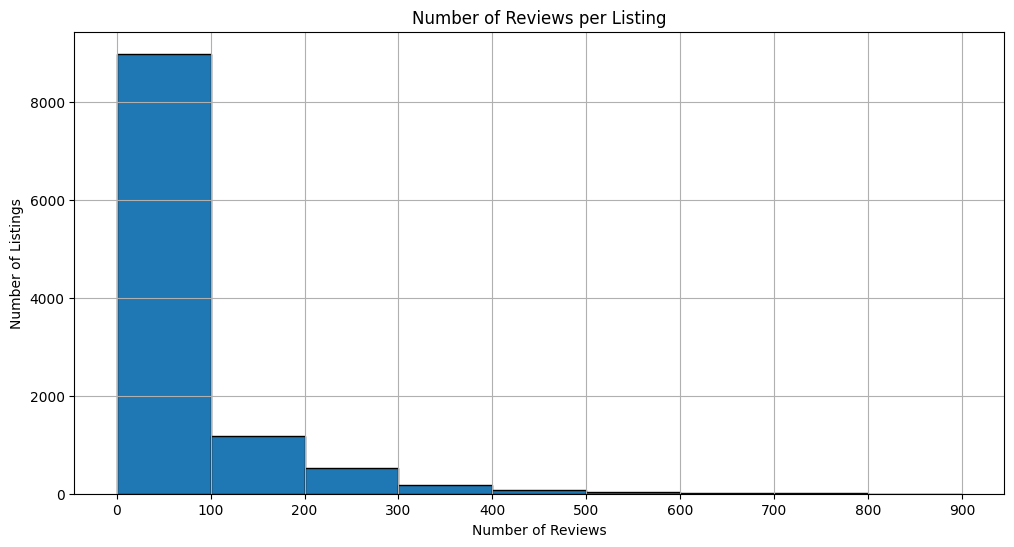

In [18]:
# Calculate the minimum and maximum number of reviews
max_reviews = reviews.groupby('listing_id')['id'].count().max()

# Round max_reviews up to the closest hundred
max_reviews = 100 * np.ceil(max_reviews / 100)

# Create bins for the histogram
bins = np.arange(0, max_reviews + 1, 100)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(reviews.groupby('listing_id')['id'].count(), bins=bins, edgecolor='k')

# Set plot title and axis labels
plt.title('Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.grid(True)

# Automatically generate custom x-axis ticks
custom_ticks = np.linspace(0, max_reviews, 10).astype(int)
plt.xticks(custom_ticks)

# Display the plot
plt.show()


In [19]:
# Calculate average reviews per month for listings
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(0)

# Assume Half of Bookings Result in Reviews
listings['total_bookings_per_month'] = (listings['reviews_per_month'] * 2)

# Calculate and display listings with total bookings per month
result = listings[['id', 'total_bookings_per_month']].sort_values('total_bookings_per_month', ascending=False)
result

,id,total_bookings_per_month
7248,54251276,31.00
11736,914571599230791078,26.60
5559,43778929,22.44
11095,881606431285667955,22.28
12573,952653984892688974,22.00
...,...,...
10786,866691337158145096,0.00
4801,39241951,0.00
10788,866696947005525102,0.00
10789,862096355451812486,0.00


In [20]:
# Calculate the average price per night
avg_price = listings['price'].mean()

# Calculate the estimated income per month based on occupied nights
listings['occupied_nights_per_month'] = listings['total_bookings_per_month'] * 3
listings['occupied_nights_per_month'] = listings['occupied_nights_per_month'].clip(upper=30)
listings['avg_income_per_month'] = listings['occupied_nights_per_month'] * avg_price

# Display listing IDs with income
listings[['id', 'avg_income_per_month']]


,id,avg_income_per_month
0,10595,175.173914
1,10990,306.554349
2,10993,431.678573
3,10995,118.868013
4,724485,2421.153738
...,...,...
12950,981055995149838218,0.000000
12951,981172247690878612,0.000000
12952,981209310562228052,0.000000
12953,981572315765430441,0.000000


### Calculating average income based only on the reviews of the last 12 months

In [30]:
# Filter out rows with missing "number_of_reviews_ltm"
listings_with_reviews_ltm = listings.dropna(subset=['number_of_reviews_ltm'])

# Calculate the average reviews per month for each listing in the last year
listings_with_reviews_ltm['average_reviews_per_month'] = listings_with_reviews_ltm['number_of_reviews_ltm'] / 12

# Display the resulting DataFrame with listing IDs and their corresponding average reviews per month
result = listings_with_reviews_ltm[['id', 'average_reviews_per_month']]

print(result)


                       id  average_reviews_per_month
0                   10595                   0.666667
1                   10990                   0.250000
2                   10993                   0.416667
3                   10995                   0.083333
4                  724485                   2.166667
...                   ...                        ...
12950  981055995149838218                   0.000000
12951  981172247690878612                   0.000000
12952  981209310562228052                   0.000000
12953  981572315765430441                   0.000000
12954  981584450488097206                   0.000000

[12954 rows x 2 columns]


In [22]:
# Calculate the average price per night
avg_price = listings['price'].mean()

# Calculate the estimated income per month based on occupied nights
listings['occupied_nights_per_month_last_year'] = listings_with_reviews_ltm['average_reviews_per_month'] * 2 * 3
listings['occupied_nights_per_month_last_year'] = listings['occupied_nights_per_month_last_year'].clip(upper=30)
listings['avg_income_per_month_last_year'] = listings['occupied_nights_per_month_last_year'] * avg_price

# Display listing IDs with income
listings[['id', 'avg_income_per_month_last_year']]


,id,avg_income_per_month_last_year
0,10595,417.080747
1,10990,156.405280
2,10993,260.675467
3,10995,52.135093
4,724485,1355.512429
...,...,...
12950,981055995149838218,0.000000
12951,981172247690878612,0.000000
12952,981209310562228052,0.000000
12953,981572315765430441,0.000000


## Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

In [23]:
# Number of listings per room type
room_type_counts = listings['room_type'].value_counts()

# Percentage of listings for each room type
room_type_percentages = (room_type_counts / len(listings)) * 100

# Display results
print("Number of Listings per Room Type:")
print(room_type_counts)

print("\nPercentage of Listings per Room Type:")
print(room_type_percentages)

Number of Listings per Room Type:
room_type
Entire home/apt    11651
Private room        1113
Hotel room           105
Shared room           85
Name: count, dtype: int64

Percentage of Listings per Room Type:
room_type
Entire home/apt    89.941331
Private room        8.591941
Hotel room          0.810560
Shared room         0.656168
Name: count, dtype: float64


In [24]:
# Create a pivot table for the number of listings per neighborhood and room type
neighborhood_room_type_counts = listings.pivot_table(index='neighbourhood_cleansed', columns='room_type', values='id', aggfunc='size', fill_value=0)

# Display the results
print("\nNumber of Listings per Neighborhood and Room Type:")
neighborhood_room_type_counts


Number of Listings per Neighborhood and Room Type:


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_cleansed,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,55,0,0,0
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,33,0,5,0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,686,4,117,10
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,91,0,8,0
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,74,0,2,0
ΑΚΡΟΠΟΛΗ,360,6,20,0
ΑΜΠΕΛΟΚΗΠΟΙ,431,0,17,4
ΑΝΩ ΚΥΨΕΛΗ,103,0,16,0
ΑΝΩ ΠΑΤΗΣΙΑ,61,0,3,0


## Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

In [25]:
# Group the data by 'listing_id' and calculate the average price per listing
average_price_per_listing = calendar.groupby('listing_id')['price'].mean().reset_index()

# Display the table with the average price per listing
average_price_per_listing

,listing_id,price
0,10595,262.602740
1,10990,72.260274
2,10993,59.397260
3,10995,74.978082
4,27262,71.315068
...,...,...
12950,983937080532919737,59.539726
12951,984280014002068815,155.000000
12952,984280014714317399,162.000000
12953,984280015206592938,169.000000


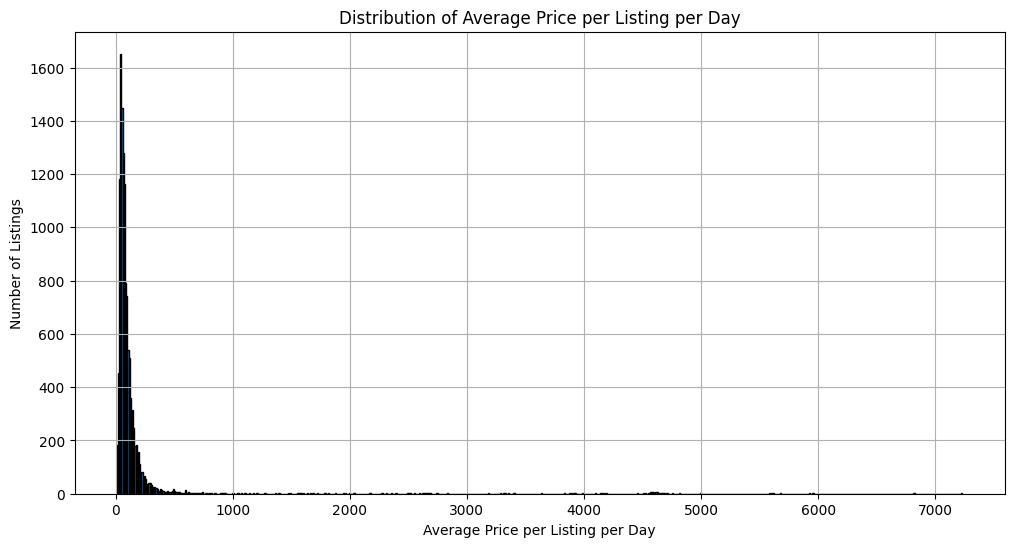

In [26]:
# Calculate the minimum and maximum average price
min_average_price = average_price_per_listing['price'].min()
max_average_price = average_price_per_listing['price'].max()

# Create bins for the histogram with 10-unit increments within the range of prices
bins = np.arange(min_average_price, max_average_price + 10, 10)

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(average_price_per_listing['price'], bins=bins, edgecolor='k')
plt.title('Distribution of Average Price per Listing per Day')
plt.xlabel('Average Price per Listing per Day')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

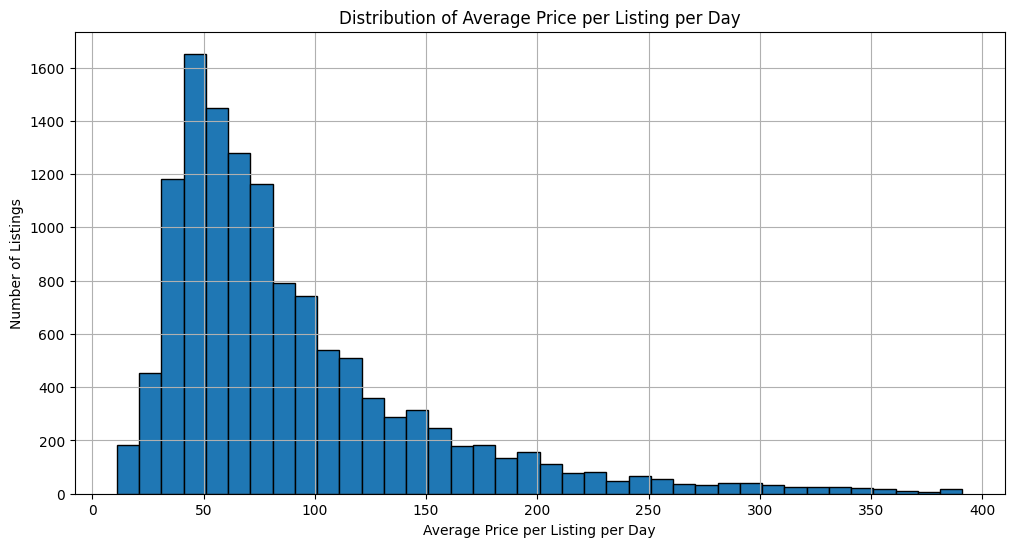

In [27]:
# We set the minimum price based on our dataset, and
# limit the maximum price to 400. This allows us to focus on the distribution of average prices
# for listings within the range of 0 to 400 price units.

bins = np.arange(min_average_price, 400, 10)

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(average_price_per_listing['price'], bins=bins, edgecolor='k')
plt.title('Distribution of Average Price per Listing per Day')
plt.xlabel('Average Price per Listing per Day')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()


## Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

        host_id  listings_count
0      20104194             114
1     113548208              88
2      90390850              78
3        748818              74
4      47267002              61
...         ...             ...
3032  467198093               1
3033  467199987               1
3034  427079707               1
3035  271255782               1
5773  537287187               1

[5774 rows x 2 columns]


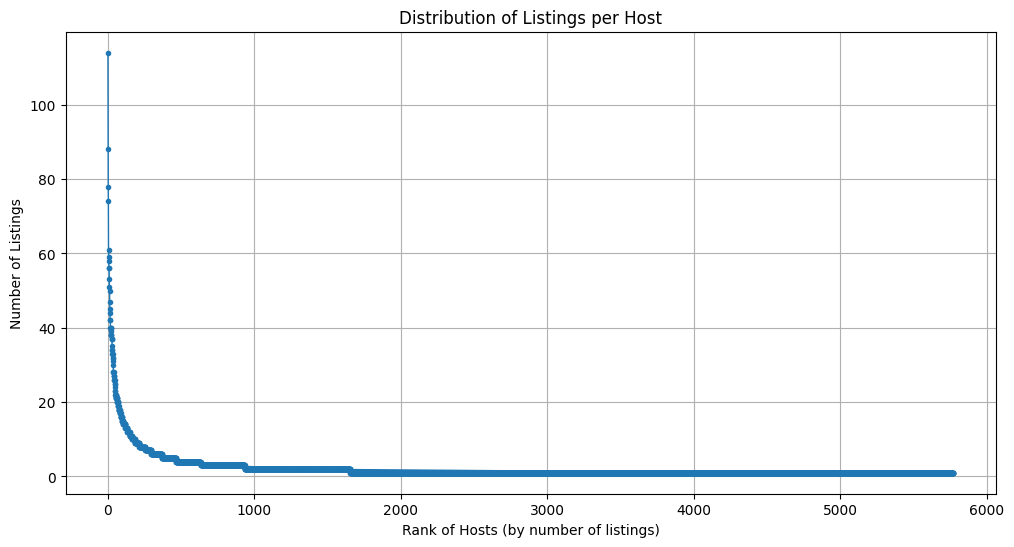

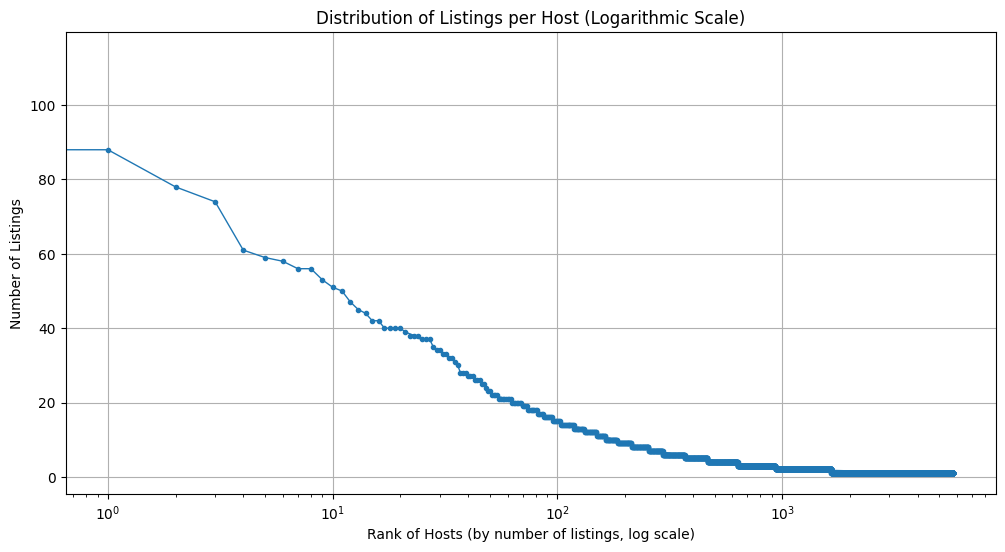

In [28]:
# Count the number of listings per host
listings_per_host = listings['host_id'].value_counts().reset_index()
listings_per_host.columns = ['host_id', 'listings_count']

# Sort the DataFrame by listings_count in descending order
listings_per_host = listings_per_host.sort_values(by='listings_count', ascending=False)

# Create a table with the number of listings per host
print(listings_per_host)

import matplotlib.pyplot as plt

def plot_listings_per_host(listings_per_host, title, x_axis_label, y_axis_label, log_scale=False):
    plt.figure(figsize=(12, 6))
    plt.plot(listings_per_host.index, listings_per_host['listings_count'], marker='o', markersize=3, linestyle='-', linewidth=1)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.grid(True)
    if log_scale:
        plt.xscale('log')

# Plot the distribution of listings per host
plot_listings_per_host(listings_per_host, 'Distribution of Listings per Host', 'Rank of Hosts (by number of listings)', 'Number of Listings')

# Plot the same graph with a logarithmic x-axis
plot_listings_per_host(listings_per_host, 'Distribution of Listings per Host (Logarithmic Scale)', 'Rank of Hosts (by number of listings, log scale)', 'Number of Listings', log_scale=True)

# Display the plots
plt.show()


## Visualize Listings

Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

In [29]:
# Create a map centered around Athens
athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start=12, prefer_canvas=True)

# Define a function to remove special characters from a string
def remove_special_characters(text):
    # Remove HTML line break tags like <br /> or <br>
    text = re.sub(r'<br\s?/?>', ' ', text)
    text = re.sub(r'<b\s?/?>', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Create a MarkerCluster with customized settings
marker_cluster = MarkerCluster(
    max_cluster_radius=50,  # Increase the maximum cluster radius
    min_cluster_size=5,  # Reduce the minimum cluster size
).add_to(athens_map)

# Iterate through the dataset and add markers for each listing
# Iterate through the dataset and add markers for each listing
for index, row in listings.iterrows():
    # Extract the necessary data
    id = row['id']
    name = row['name']
    description = str(row['description'])[:300]  # Ensure 'description' is converted to a string
    description = remove_special_characters(description) + "..."
    latitude = row['latitude']
    longitude = row['longitude']
    link = row['listing_url']

    # Create a popup for the marker
    popup_text = f"<div style='width: 300px;'><span style='font-size: 14px;'><b>{name}</b></span><br>{description} <br><a href='{link}' target='_blank'>Show more</a><br></div>"

    # Add a marker to the MarkerCluster group with the custom popup content
    folium.Marker([latitude, longitude], popup=folium.Popup(popup_text)).add_to(marker_cluster)

# Save the map to an HTML file
athens_map.save('athens_airbnb_map_with_clusters.html')

# Specify the path to the HTML file you saved your map in
html_map_path = 'athens_airbnb_map_with_clusters.html'

# Set the width and height of the iframe to fit your map
iframe = IFrame(html_map_path, width='100%', height=500)

# Display the iframe in your Jupyter Notebook
iframe
